<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day1_Text_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imported** **Textblob**




In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
import json
greviews = []
with open('/content/Gift_Cards.jsonl', 'r') as file:
    for line in file:
        greviews.append(json.loads(line))

In [ ]:
# Examine the structure of one review
print(json.dumps(greviews[0], indent=2))

{
  "rating": 5.0,
  "title": "Great gift",
  "text": "Having Amazon money is always good.",
  "images": [],
  "asin": "B00IX1I3G6",
  "parent_asin": "B00IX1I3G6",
  "user_id": "AHZ6XMOLEWA67S3TX7IWEXXGWSOA",
  "timestamp": 1549866158332,
  "helpful_vote": 0,
  "verified_purchase": true
}


In [ ]:
greviews[0].keys()

dict_keys(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'])

In [ ]:
for i in range(5):
    print(greviews[i])

{'rating': 5.0, 'title': 'Great gift', 'text': 'Having Amazon money is always good.', 'images': [], 'asin': 'B00IX1I3G6', 'parent_asin': 'B00IX1I3G6', 'user_id': 'AHZ6XMOLEWA67S3TX7IWEXXGWSOA', 'timestamp': 1549866158332, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'amazon gift card', 'text': "Always the perfect gift.  I have never given one and had someone seem or act disappointed.  Just the opposite.  They are thrilled and excited to have a bit of a spree.  Always the perfect size and color!  Arrives in 1 day in most cases.  So it's never too late!  Lots of cards to chose from... thank you... birthday... wedding..baby..  and many that work for many occasions...", 'images': [], 'asin': 'B005ESMMWW', 'parent_asin': 'B005ESMMWW', 'user_id': 'AFZUK3MTBIBEDQOPAK3OATUOUKLA', 'timestamp': 1599875158120, 'helpful_vote': 0, 'verified_purchase': False}
{'rating': 5.0, 'title': 'perfect gift', 'text': "When you have a person who is hard to shop for.. an amazon gift ca

In [ ]:
print(f"Total number of reviews in dataset: {len(greviews)}")

Total number of reviews in dataset: 152410


create a function to extract and clean the text from each review

In [ ]:
def clean_text(review):
    # Extract text from review
    text = review.get('text', '')

    # Add title if available (optional)
    title = review.get('title', '')
    if title:
        full_text = title + ". " + text
    else:
        full_text = text

    # Basic cleaning
    cleaned_text = full_text.lower().strip()

    return cleaned_text

Apply this function to your reviews and check some examples

In [ ]:
# Apply cleaning to each review
cleaned_reviews = []
for review in greviews:
    cleaned_text = clean_text(review)
    cleaned_reviews.append({
        'original_rating': review.get('rating', None),
        'text': cleaned_text,
        'asin': review.get('asin', '')  # product identifier
    })

# Check a few examples
for i in range(min(5, len(cleaned_reviews))):
    print(f"Review {i+1}: {cleaned_reviews[i]['text'][:100]}...")
    print(f"Original rating: {cleaned_reviews[i]['original_rating']}\n")

Review 1: great gift. having amazon money is always good....
Original rating: 5.0

Review 2: amazon gift card. always the perfect gift.  i have never given one and had someone seem or act disap...
Original rating: 5.0

Review 3: perfect gift. when you have a person who is hard to shop for.. an amazon gift card is p e r f e c t....
Original rating: 5.0

Review 4: nice looking. the tin is a nice touch and pretty large.  it's about 4&#34; in diameter and about 1/2...
Original rating: 5.0

Review 5: not $10 gift cards. i bought this pack of starbucks gift cards in 2019. ive given them to friends an...
Original rating: 1.0



Now you're ready to analyze sentiment! Let's install TextBlob

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


Then, create a function to analyze sentiment

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Create TextBlob object
    blob = TextBlob(text)

    # Get sentiment polarity (-1 to 1)
    polarity = blob.sentiment.polarity

    # Classify sentiment
    if polarity > 0.1:
        sentiment = 'positive'
    elif polarity < -0.1:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return {
        'polarity': polarity,
        'sentiment': sentiment
    }

apply the sentiment analysis function to each cleaned review

In [ ]:
from textblob import TextBlob

# Apply sentiment analysis to each review
for review in cleaned_reviews:
    sentiment_results = analyze_sentiment(review['text'])
    review['polarity'] = sentiment_results['polarity']
    review['sentiment'] = sentiment_results['sentiment']

# Check a few examples with sentiment
print("Sample reviews with sentiment analysis:")
for i in range(min(5, len(cleaned_reviews))):
    print(f"Review: {cleaned_reviews[i]['text'][:100]}...")
    print(f"Original rating: {cleaned_reviews[i]['original_rating']}")
    print(f"Sentiment: {cleaned_reviews[i]['sentiment']} (polarity: {cleaned_reviews[i]['polarity']:.2f})\n")

Sample reviews with sentiment analysis:
Review: great gift. having amazon money is always good....
Original rating: 5.0
Sentiment: positive (polarity: 0.75)

Review: amazon gift card. always the perfect gift.  i have never given one and had someone seem or act disap...
Original rating: 5.0
Sentiment: positive (polarity: 0.34)

Review: perfect gift. when you have a person who is hard to shop for.. an amazon gift card is p e r f e c t....
Original rating: 5.0
Sentiment: positive (polarity: 0.59)

Review: nice looking. the tin is a nice touch and pretty large.  it's about 4&#34; in diameter and about 1/2...
Original rating: 5.0
Sentiment: positive (polarity: 0.32)

Review: not $10 gift cards. i bought this pack of starbucks gift cards in 2019. ive given them to friends an...
Original rating: 1.0
Sentiment: neutral (polarity: 0.01)



let's analyze the distribution of sentiment in your dataset

In [ ]:
# Count sentiments
sentiment_counts = {'positive': 0, 'neutral': 0, 'negative': 0}
for review in cleaned_reviews:
    sentiment_counts[review['sentiment']] += 1

# Calculate percentages
total = len(cleaned_reviews)
percentages = {k: (v/total)*100 for k, v in sentiment_counts.items()}

print("Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews ({percentages[sentiment]:.1f}%)")

Sentiment Distribution:
positive: 116325 reviews (76.3%)
neutral: 28733 reviews (18.9%)
negative: 7352 reviews (4.8%)


 let's visualize the sentiment distribution

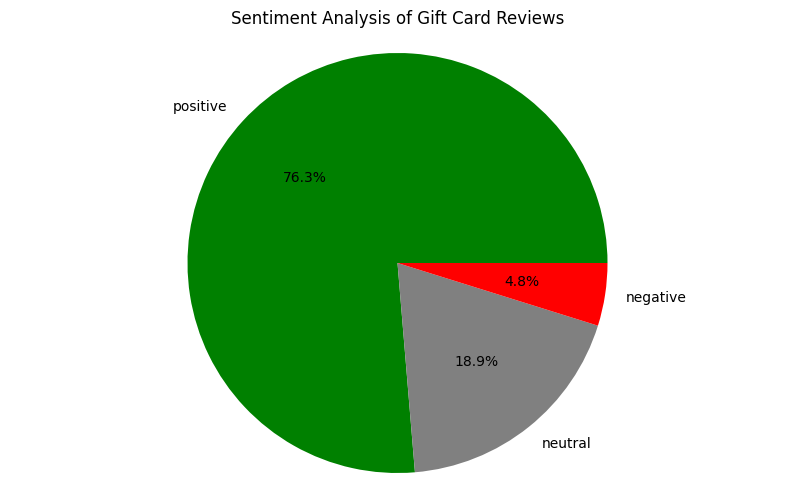

In [ ]:
import matplotlib.pyplot as plt

# Pie chart of sentiment distribution
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%',
        colors=['green', 'gray', 'red'])
plt.title('Sentiment Analysis of Gift Card Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

let's compare the sentiment analysis with the original star ratings

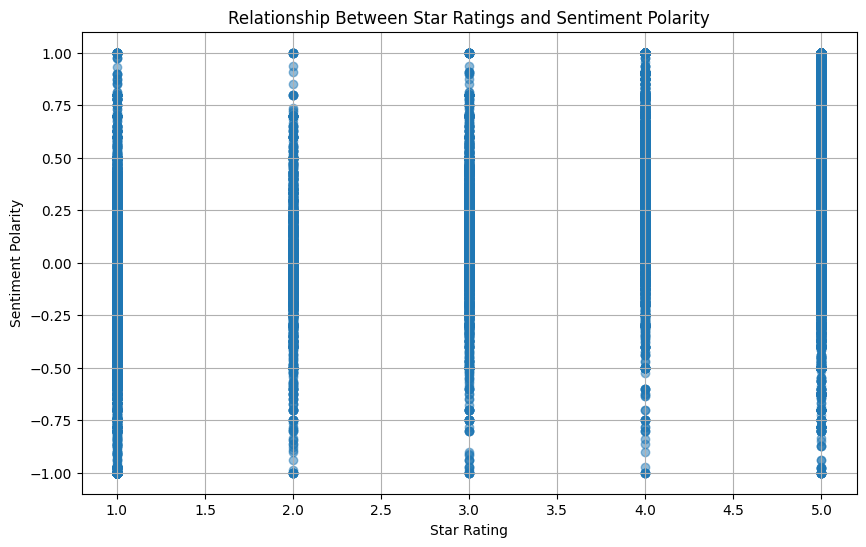

In [ ]:
# Create lists for plotting
ratings = []
polarities = []

for review in cleaned_reviews:
    if review['original_rating'] is not None:  # Skip if rating is missing
        ratings.append(review['original_rating'])
        polarities.append(review['polarity'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ratings, polarities, alpha=0.5)
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.title('Relationship Between Star Ratings and Sentiment Polarity')
plt.grid(True)
plt.show()